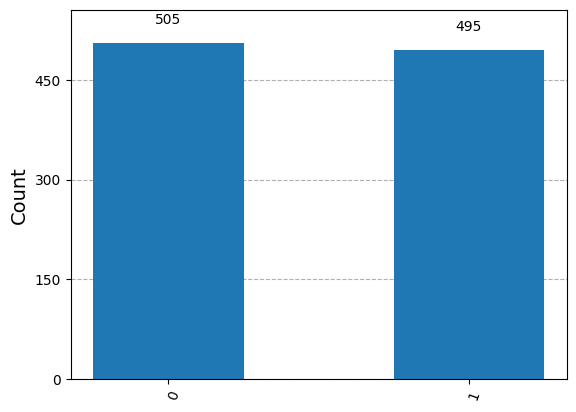

In [35]:
%matplotlib inline

from qiskit import QuantumCircuit
from qiskit_aer import Aer, noise
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create a simple quantum circuit
qc = QuantumCircuit(3, 1)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.barrier()
qc.cx(0, 1)
qc.cx(0, 2)
qc.ccx(1, 2, 0)
qc.measure(0, 0)

# Simulate noise
noise_model = noise.NoiseModel()
error_1 = noise.errors.depolarizing_error(0.1, 1)
error_2 = noise.errors.depolarizing_error(0.1, 2)
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Execute the circuit on a noisy simulator
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc, noise_model=noise_model, shots=1000).result()
counts = result.get_counts(qc)

# Plot the results
plot_histogram(counts)
plt.show()